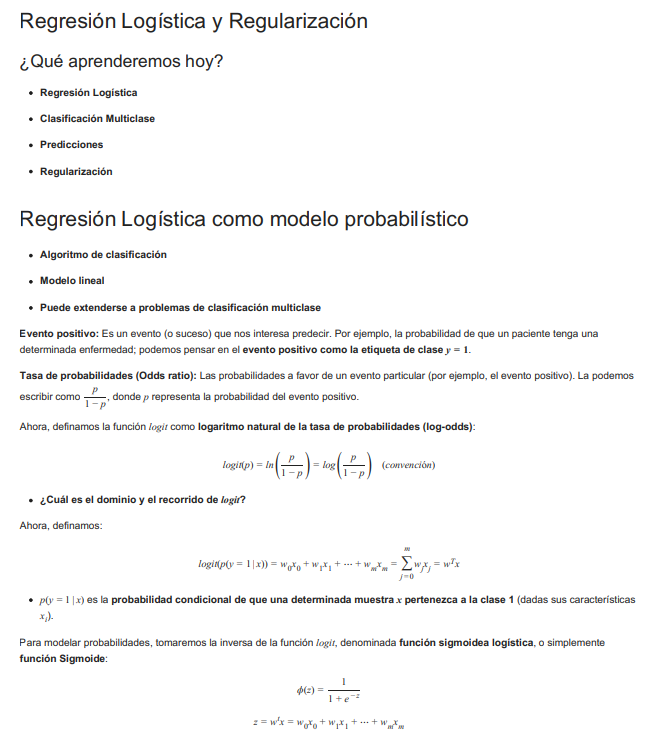

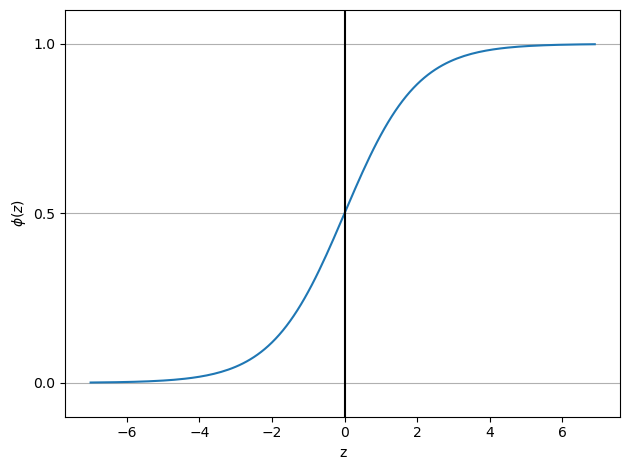

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)

phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

# Modelo predictivo


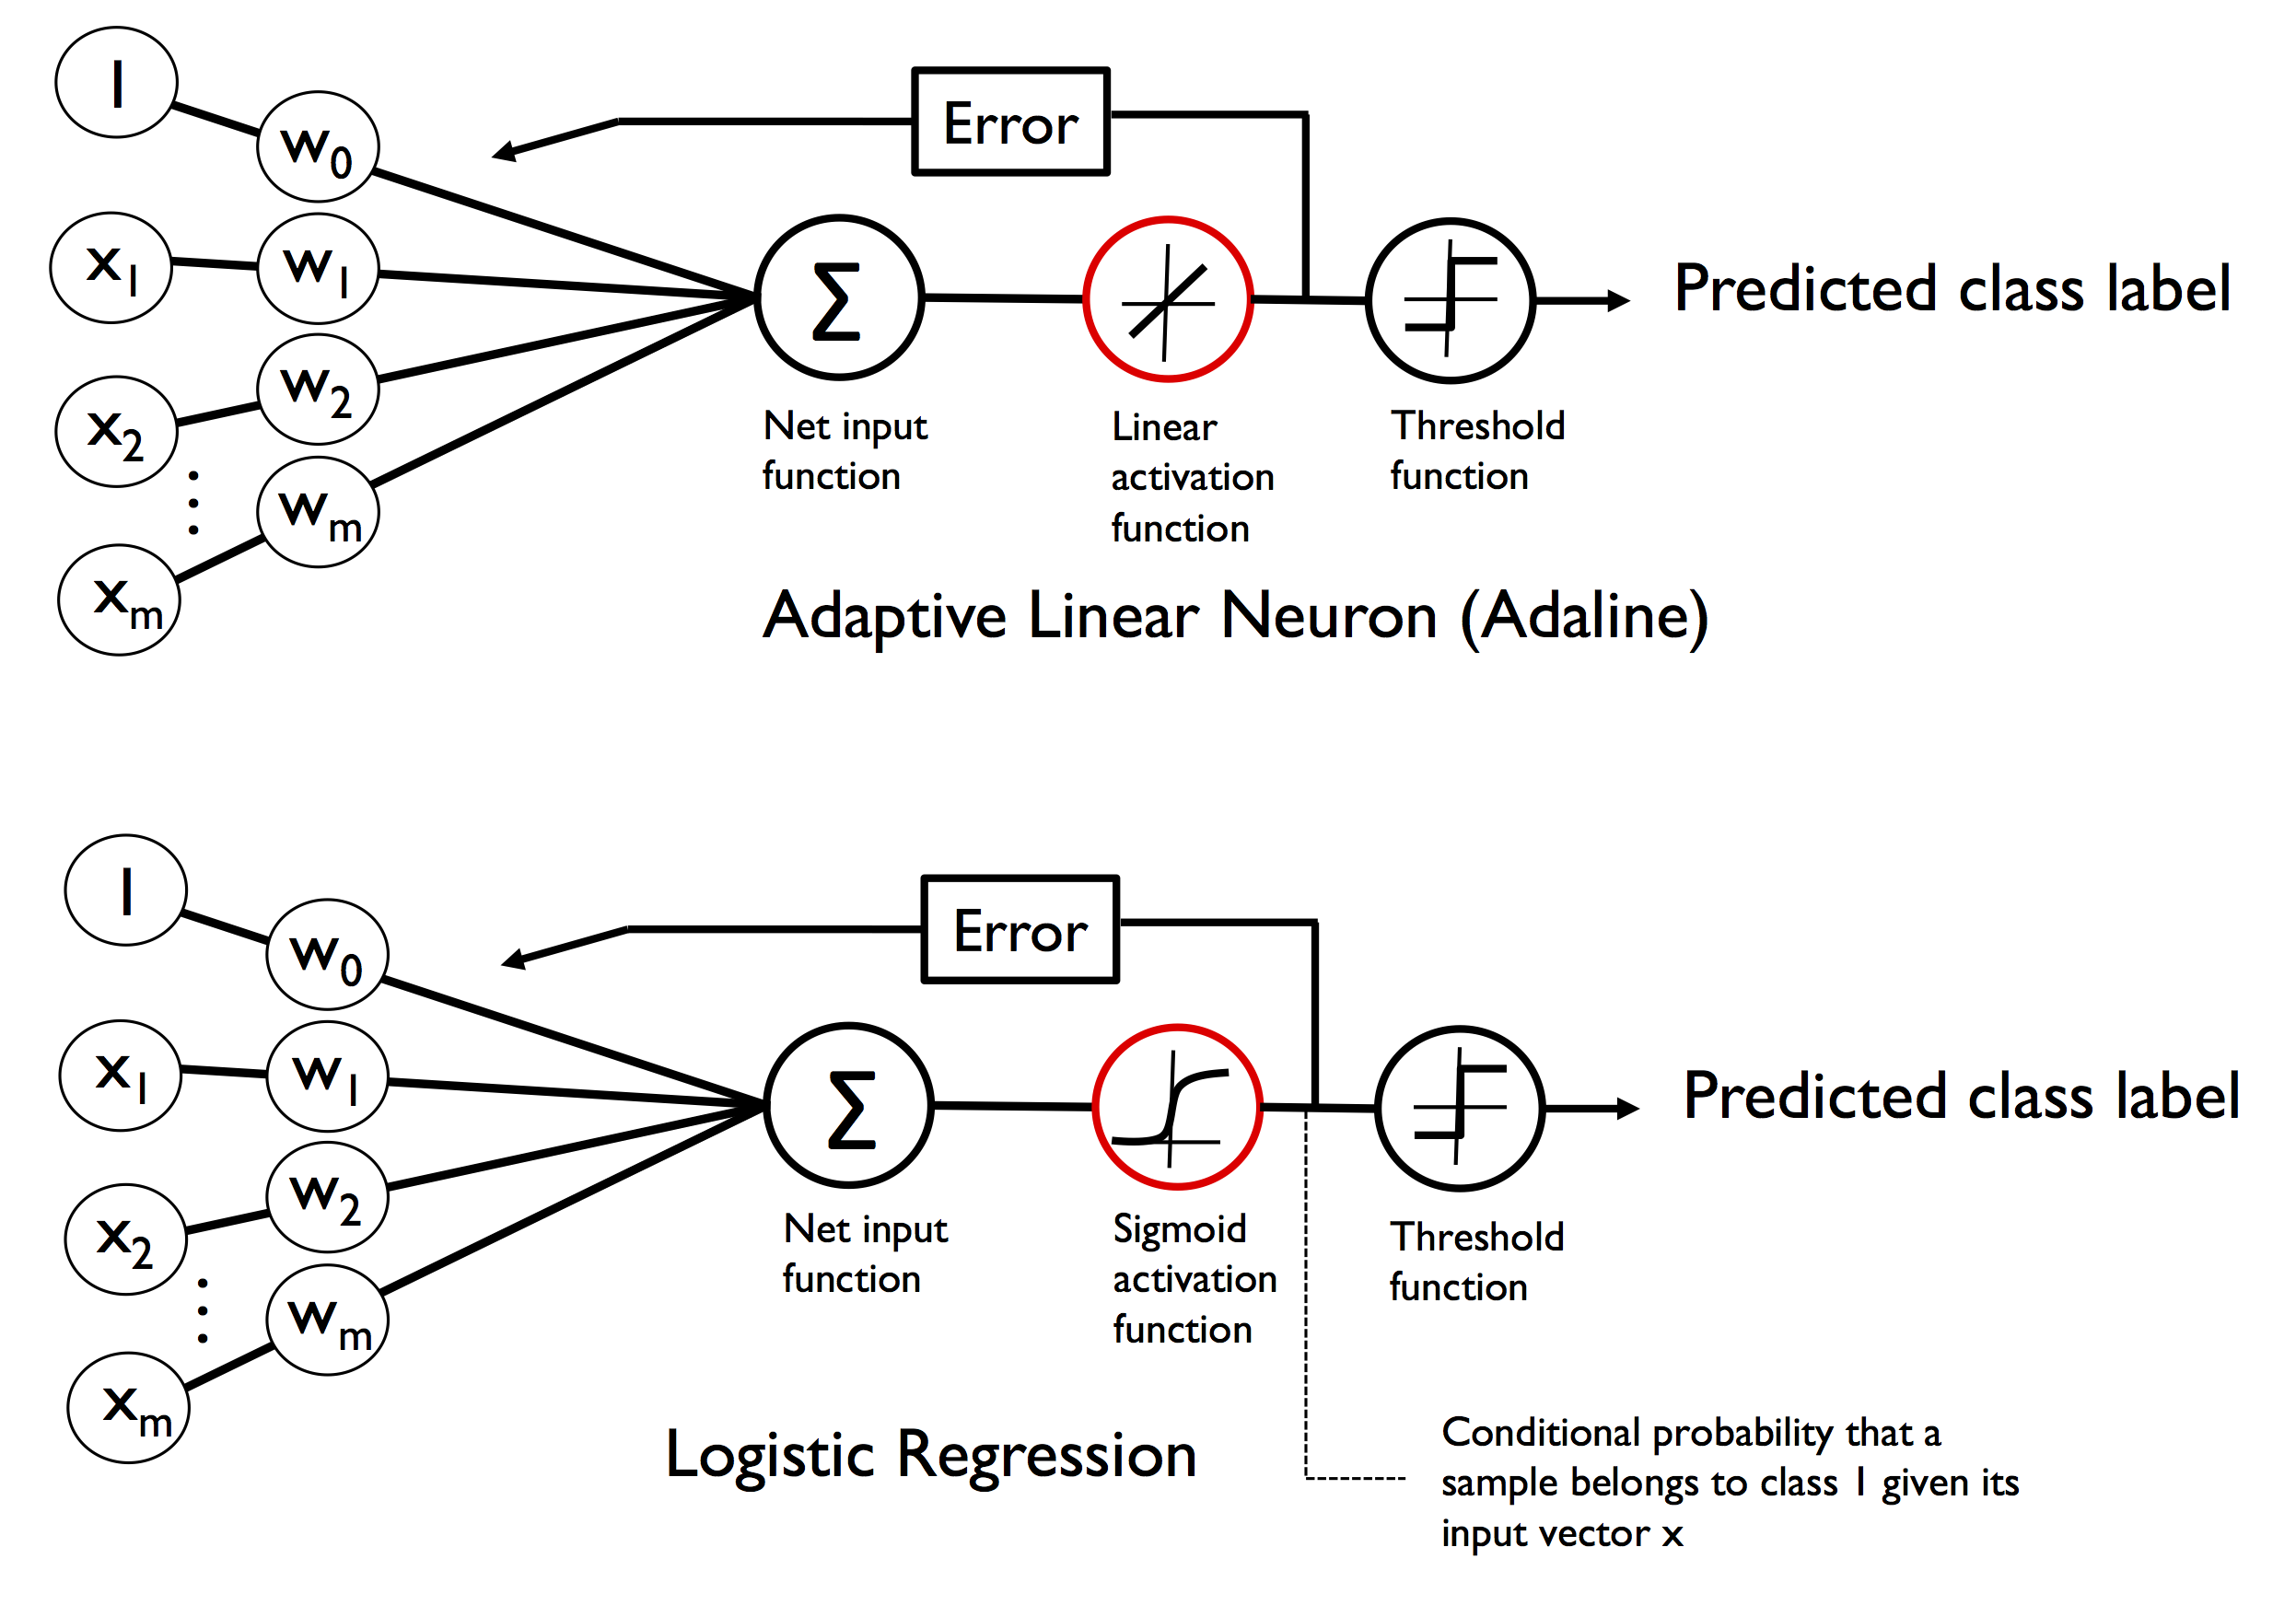

In [1]:
from IPython.display import Image
Image(filename=r'Imagenes_Clase_04/5_1.png', width=600)


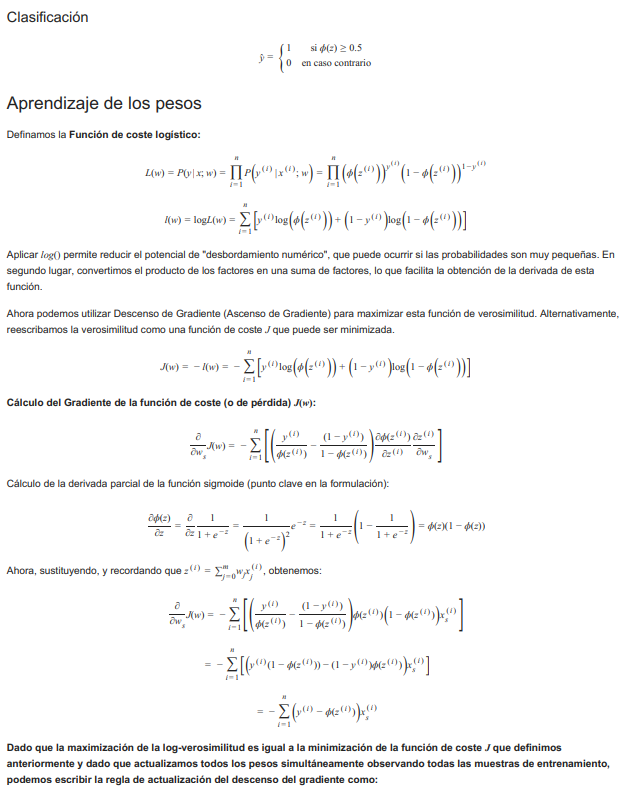
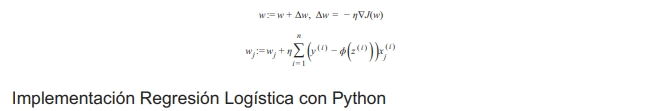

In [2]:
class LogisticRegressionGD(object):
    """Clasificador regresión logística mediante descenso de gradiente.
    Parámetros
    ------------
    eta : float
    Learning rate (entre 0.0 y 1.0)
    n_iter : int
    Cantidad de épocas de entrenamiento.
    random_state : int
    Semilla para generar pesos aleatorios.
    Atributos
    -----------
    w_ : 1d-array
    Vector de pesos al término del entrenamiento.
    cost_ : list
    Valor de la función de costo logístico en cada época.
    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """ Entrenamiento.
        Parametros
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Vector de entrenamiento, donde n_samples es el número de muestras y
        n_features es el número de características.
        y : array-like, shape = [n_samples]
        Valor de salida (etiquetas).
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        """Calcular entrana neta, z"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, z):
        """Calcular activación sigmoidea logística"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    def predict(self, X):
        """Etiqueta de clase después del paso unitario"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
        # esto es equivalente a:
        # return np.where(self.net_input(X) >= 0.0, 1, 0)

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
name_columns = ['sepal_length','sepal_width','petal_length','petal_width']
variable_names=list(name_columns[2:4])
print(variable_names)
y = iris.target
name_clases=np.unique(y)
print('Etiquetas de Clase:', name_clases)

['petal_length', 'petal_width']
Etiquetas de Clase: [0 1 2]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print('Cantidad de etiquetas en y:', np.bincount(y))
print('Cantidad de etiquetas en y_train:', np.bincount(y_train))
print('Cantidad de etiquetas en y_test:', np.bincount(y_test))


Cantidad de etiquetas en y: [50 50 50]
Cantidad de etiquetas en y_train: [35 35 35]
Cantidad de etiquetas en y_test: [15 15 15]


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [10]:
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, plot_object,test_idx=None, only_train=False, only_test=False, clases_names=['clase 0','clase 1'],resolution=0.02):
    markers = ('s', 'o', '^', 'v', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    #plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    #plt.xlim(xx1.min(), xx1.max())
    #plt.ylim(xx2.min(), xx2.max())
    plot_object.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    #plot_object.xlim(xx1.min(), xx1.max())
    #plot_object.ylim(xx2.min(), xx2.max())
    if not(only_test):
        for idx, cl in enumerate(np.unique(y)):
            #plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],
            # marker=markers[idx],label=clases_names[idx],edgecolor='black')
            plot_object.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],
                marker=markers[idx],label=clases_names[idx],edgecolor='black')
    if not(test_idx is None) and not(only_train):
        X_test, y_test = X[test_idx, :], y[test_idx]
        for idx, cl in enumerate(np.unique(y_test)):
            #plt.scatter(x=X_test[y_test == cl, 0],y=X_test[y_test == cl, 1],alpha=0.8,c=colors[idx],
            # marker='x',label='test set')
            plot_object.scatter(x=X_test[y_test == cl, 0],y=X_test[y_test == cl, 1],alpha=0.8,c=colors[idx],
                marker='x',label='test set')


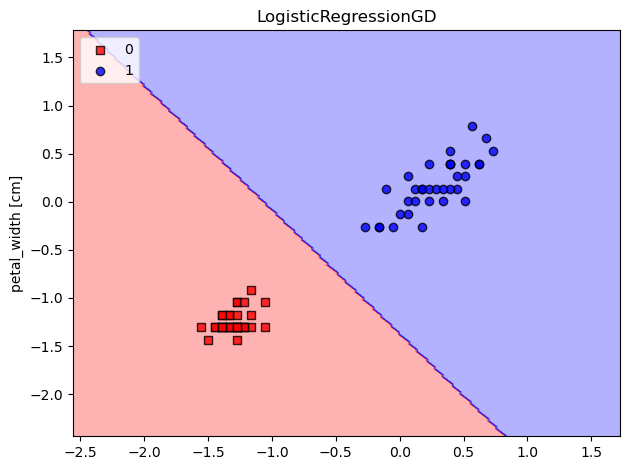

In [11]:
X_train_std_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
name_clases=np.unique(y_train_01_subset)
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_std_01_subset,y_train_01_subset)
plot_decision_regions(X=X_train_std_01_subset, y=y_train_01_subset,classifier=lrgd,plot_object=plt,clases_names=name_clases)
plt.ylabel(f'{variable_names[1]} [cm]')
plt.title('LogisticRegressionGD')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
plt.show()


## Regresión Logística con Scikit-learn


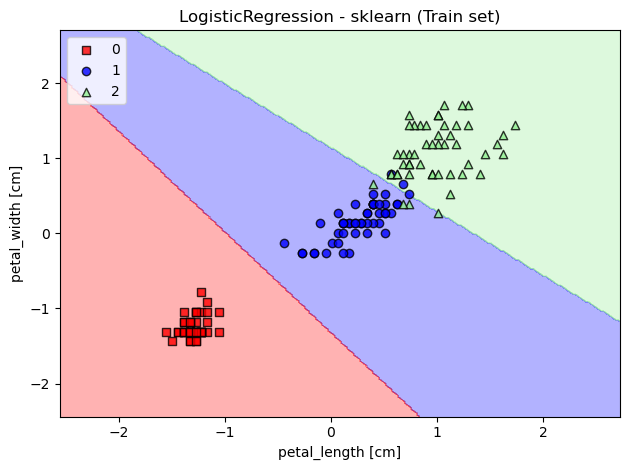

In [12]:
from sklearn.linear_model import LogisticRegression
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
name_clases=np.unique(y_combined)
lr = LogisticRegression(C=1.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=lr,
plot_object=plt, test_idx=range(105, 150),only_train=True,clases_names=name_clases)
plt.xlabel(f'{variable_names[0]} [cm]')
plt.ylabel(f'{variable_names[1]} [cm]')
plt.title('LogisticRegression - sklearn (Train set)')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_06.png', dpi=300)
plt.show()

# Preguntas
1. Cómo el algoritmo puede funcionar con 3 clases?
2. Cuántas iteraciones realizó el algoritmo en el llamado LogisticRegression(C=1.0, random_state=1)?
3. (Ejercicio) Modificar nuestra implementación LogisticRegressionGD para que funcione con multiclases.


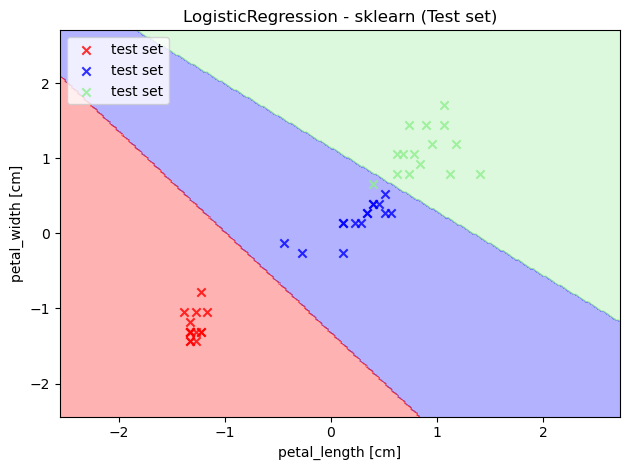

In [13]:
plot_decision_regions(X_combined_std, y_combined,classifier=lr, plot_object=plt,test_idx=range(105, 150),only_test=plt.xlabel(f'{variable_names[0]} [cm]'))
plt.ylabel(f'{variable_names[1]} [cm]')
plt.title('LogisticRegression - sklearn (Test set)')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_06.png', dpi=300)
plt.show()


In [22]:
print(lr.predict_proba(X_test_std[:4, :]))
print('--------------------------------------------')


[[4.83995335e-05 5.92935551e-02 9.40658045e-01]
 [9.08928250e-01 9.10476717e-02 2.40784543e-05]
 [9.49639874e-01 5.03535684e-02 6.55750177e-06]
 [6.57035606e-03 5.90060120e-01 4.03369524e-01]]
--------------------------------------------


In [23]:
print(lr.predict_proba(X_test_std[:4, :]).sum(axis=1))
print('--------------------------------------------')

[1. 1. 1. 1.]
--------------------------------------------


In [20]:
print(lr.predict_proba(X_test_std[:4, :]).argmax(axis=1))
print('--------------------------------------------')

[2 0 0 1]
--------------------------------------------


In [21]:
print(lr.predict(X_test_std[:4, :]))


[2 0 0 1]


In [24]:
print(y_test[:4])


[2 0 0 2]


# Ejercicios
1. Identificar las observaciones que fueron erroneamente clasificadas por el modelo lr en el conjunto de entrenamiento.
2. Comprobar que todos los datos de testeo fueron bien identificados por lr.


# Cómo abordar el sobreajuste mediante la regularización

El **overfitting** o sobreajuste es un problema común en el aprendizaje automático. Un modelo con sobreajuste funciona bien con los datos de entrenamiento, pero no generaliza bien en los datos no vistos (datos de testeo). Si un modelo sufre de sobreajuste, también decimos que el modelo tiene una **alta varianza**, que puede ser causada por tener demasiados parámetros que conducen a un modelo que es demasiado complejo dado los datos subyacentes.

Del mismo modo, un modelo también podría sufrir de **underfitting** (alto sesgo), lo que significa que el modelo no es lo suficientemente complejo como para capturar bien el patrón en los datos de entrenamiento y, por lo tanto, también sufre de bajo rendimiento en los datos no vistos.
    

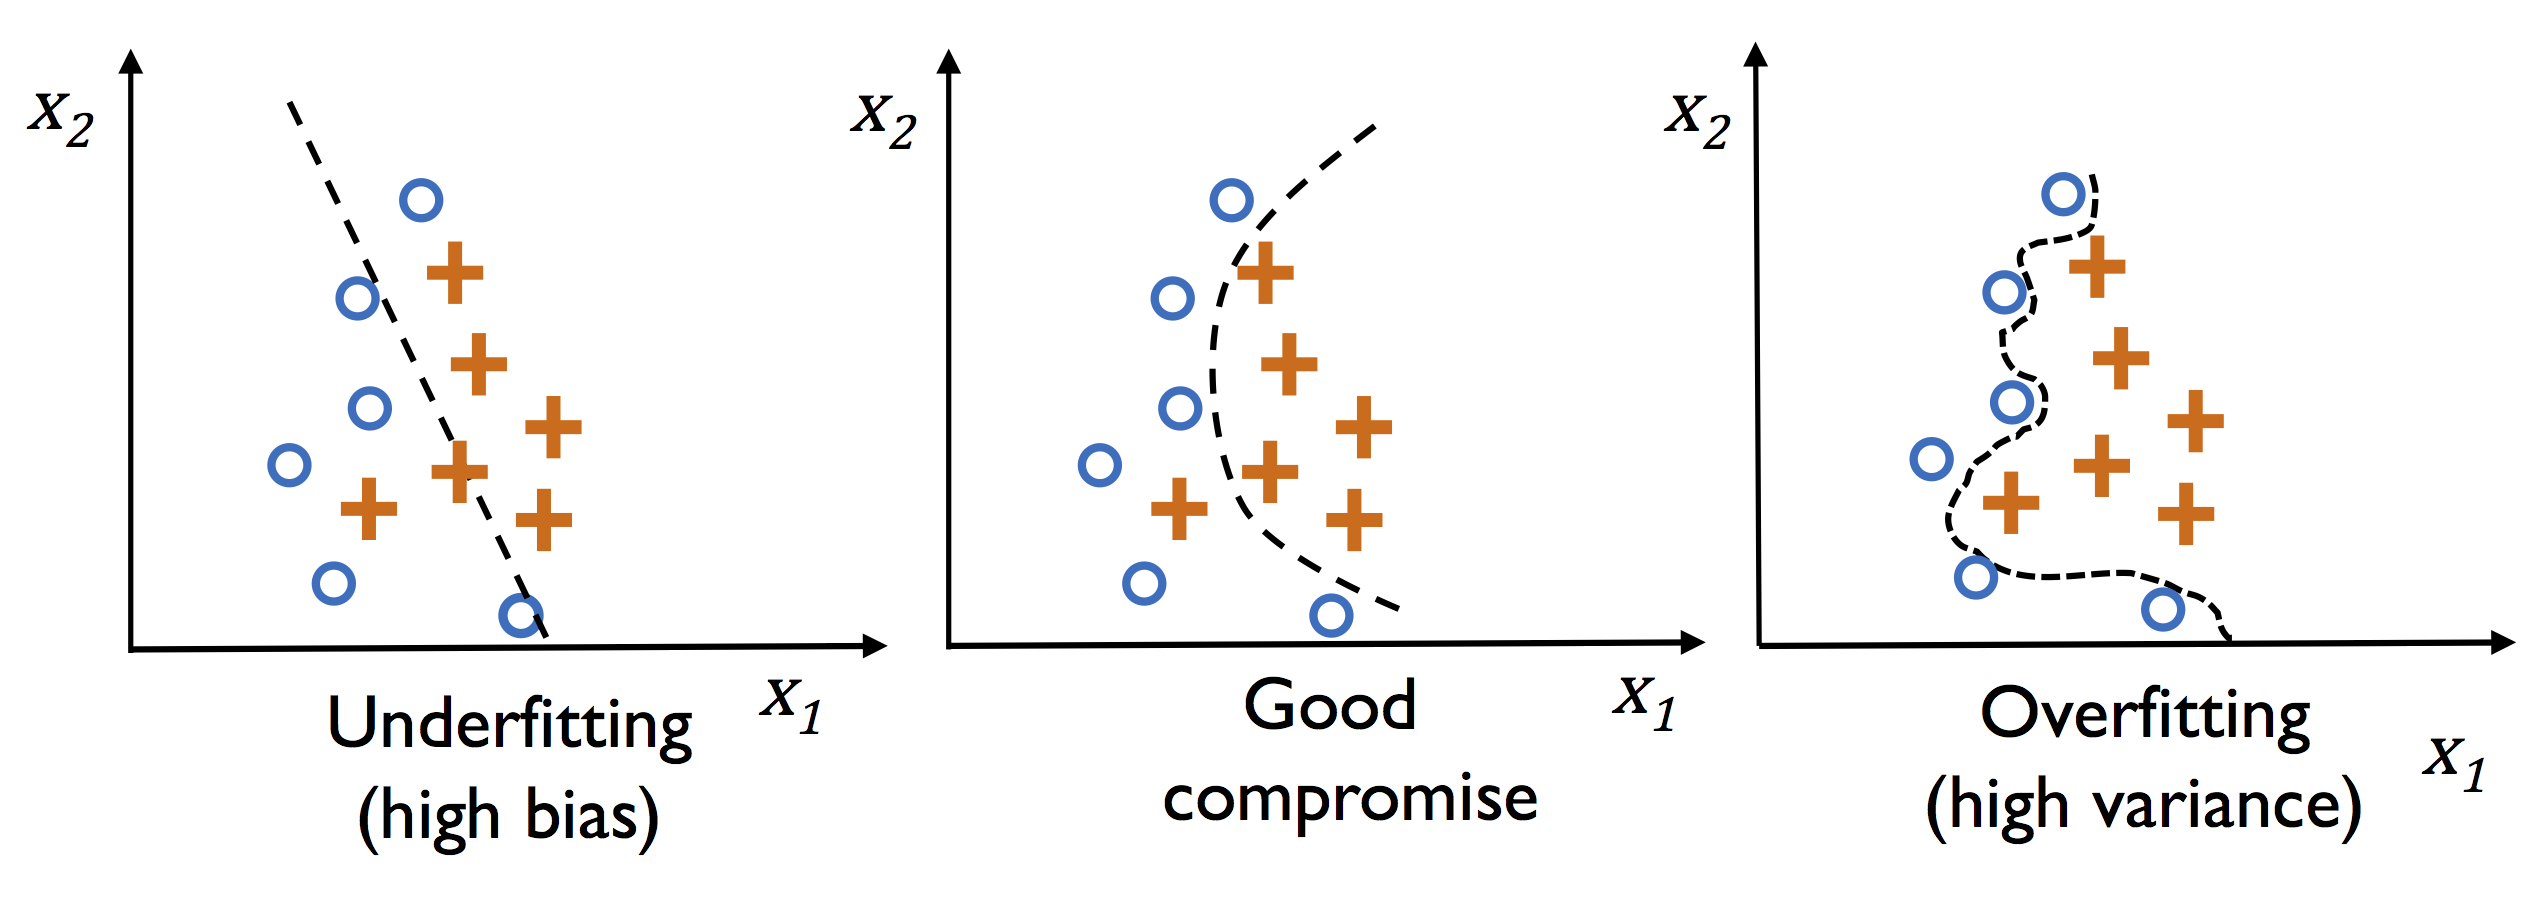

In [2]:
Image(filename=r'Imagenes_Clase_04/5_2.png', width=700)


Una forma de encontrar un buen equilibrio entre sesgo y varianza es **ajustar la complejidad del modelo mediante la regularización**.
La regularización es un método muy útil para manejar la colinealidad (alta correlación entre características), filtrar el ruido de los datos y,
finalmente, evitar el sobreajuste.
El concepto de regularización consiste en introducir información adicional (sesgo) para penalizar los valores extremos de los parámetros
(pesos). La forma más común de regularización es la llamada **regularización L2** (a veces también llamada contracción L2 o
decaimiento del peso)
- NOTA: Re-escalar las características también ayuda a regularizar un modelo.
- Regularizar la función de costo:


J(w)=\sum_{i=1}^n \left[-y^{(i)} \log \left(\phi\left(z^{(i)}\right)\right)-\left(1- y^{(i)}\right)\log \left(1-\phi\left(z^{(i)}\right)\right)\right]+\dfrac{r}
{2}\left\|w \right\|^2

A través del parámetro de regularización r, podemos controlar lo bien que nos ajustamos a los datos de entrenamiento manteniendo los
pesos en valores pequeños. Al aumentar el valor de r, aumentamos la fuerza de regularización.



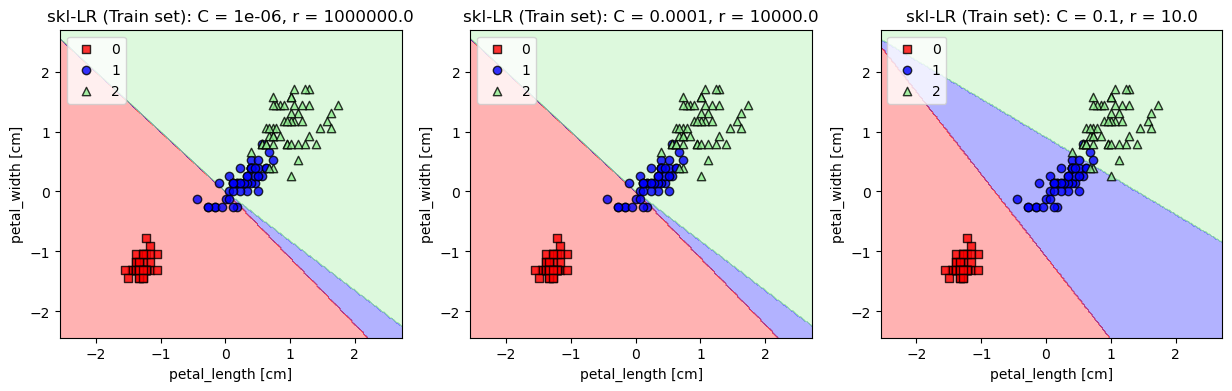

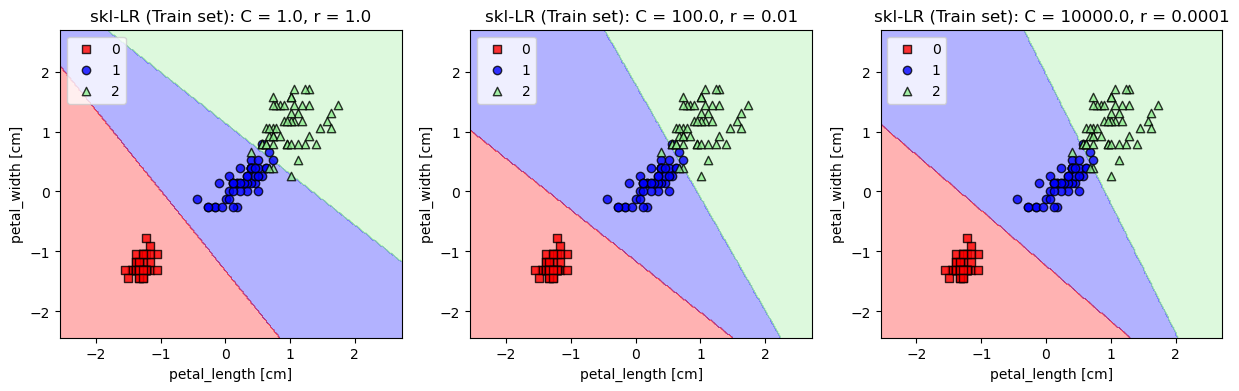

In [25]:
weights, params = [], []
r_exponentes=[-6,-4,-1,0,2,4]
for idx, c in enumerate(r_exponentes):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    if idx%3==0:
        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    plot_decision_regions(X_combined_std, y_combined,classifier=lr,
            plot_object=axs[idx%3],test_idx=range(105, 150),only_train=True,clases_names=name_clases)
    axs[idx%3].set_xlabel(f'{variable_names[0]} [cm]')
    axs[idx%3].set_ylabel(f'{variable_names[1]} [cm]')
    axs[idx%3].set_title('skl-LR (Train set): C = '+str(10.**c) + ', r = '+str(1/(10.**c)))
    axs[idx%3].legend(loc='upper left')
    if idx%3==2:
        plt.show()


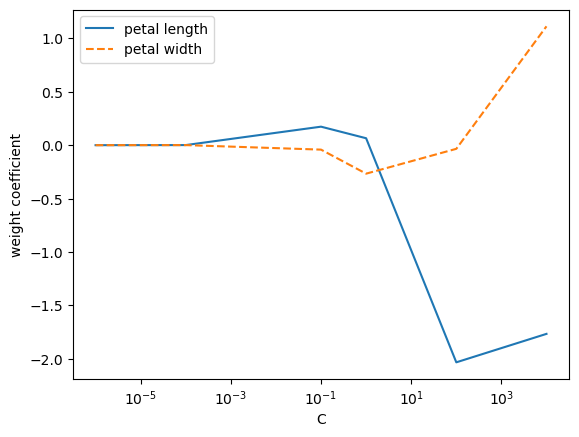

In [26]:
weights = np.array(weights)
plt.plot(params, weights[:, 0],
label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('images/03_08.png', dpi=300)
plt.show()


# Ejercicio
-   Implementar regularización L2 en nuestra implementación LogisticRegresionGD